# 5.1 가설 검정

## 두 집단 평균 비교 -- 독립 표본 t-test (independent sample t-test)
   - 목적 : 독립된 두 표본 집단의 평균 차이에 대한 가설 검정
   - 예제 : K 모바일 대리점 내부 인테리어 종류에 따라 고객 선호도 차이가 톡계적으로 유의미한지 확인해본다

(note : 마케팅 분야에서 AB테스트시 두 집단의 평균에 차이가 있는지 검정할 때 주로 사용된다)

##### 귀무가설(H0)
내부 인테리어 종류에 따라 고객 선호도에 차이가 없다.
##### 대립가설(H1)
내부 인테리어 종류에 따라 고객 선호도에 차이가 있다.

In [2]:
# 필요 라이브러리 로딩
import numpy as np
import pandas as pd

from scipy import stats # scipy : 수학 과학 공학에 특화된 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
# 데이터셀 로딩
# 제공되지 않아 제작


# clasic 랜덤값 생성
np.random.seed(1)
pre1 = np.random.randint(25, 68, size= 5)
np.random.seed(99)
pre2 = np.random.randint(41, 52, size=10)
classic_pre = np.concatenate([pre1,pre2])

np.random.seed(1)
pre3 = np.random.randint(35, 73, size = 5)
np.random.seed(17)
pre4 = np.random.randint(53, 67, size = 10)
mordern_pre = np.concatenate([pre3,pre4])

data = []
for p in classic_pre:
    data.append([p, 'classic'])
    
for p in mordern_pre:
    data.append([p, 'mordern'])

np_data = np.array(data)

df = pd.DataFrame(np_data)
df.columns = ['preference', 'interior']
df = df.astype({'preference' : 'int'})
df.head()




,preference,interior
0,62,classic
1,37,classic
2,33,classic
3,34,classic
4,36,classic


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   preference  30 non-null     int32 
 1   interior    30 non-null     object
dtypes: int32(1), object(1)
memory usage: 488.0+ bytes


In [284]:
# 데이터셋 셔플
# df.sample(frap=1, random_state=0)
df = df.sample(frac=1, random_state=0).reset_index(drop=True)

In [285]:
df.head()

,preference,interior
0,33,classic
1,60,mordern
2,46,classic
3,49,classic
4,59,mordern


In [286]:
df.shape

(30, 2)

### boxplot

Text(0.5, 1.0, 'Box Plot of Preference of Interior')

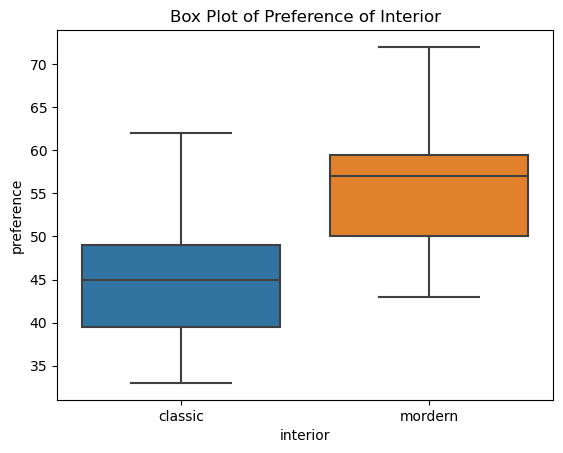

In [288]:
p = sns.boxplot(x=df['interior'], y=df['preference'])
p.set_title('Box Plot of Preference of Interior')

### Assumption 1 : 독립성
   - 독립변수 그룹은 서로 독립적

두개의 집단을 구성하는 구성원이나 구성들이 서로 관계가 없음을 의미. 즉, 아무런 관계가 없어야함


### Assumptoin 2 : 정규성 확인
   - 귀무 가설과 대립 가설은 아래와 같습니다.
      - H0 : 각 독립 표본이 정규성을 만족한다.
      - H1 : 각 독립 표본이 정규성을 만족하지 않는다.

In [289]:
#df[df['interior'] == 'classic'].head()
df.loc[ df['interior'] == 'mordern', 'interior'].value_counts()

mordern    15
Name: interior, dtype: int64

In [290]:
classic_pref = df.loc[df['interior'] == 'classic', 'preference']
# classic_pref
mordern_pref = df.loc[df['interior'] == 'mordern', 'preference']
print(mordern_pref)

1     60
4     59
5     53
6     57
8     43
9     59
11    47
14    62
15    54
17    57
20    44
21    46
24    66
27    59
28    72
Name: preference, dtype: int32


In [291]:
mordern_pref.size

15

In [292]:
# 정규성을 충족하는지 확인 (statistic : 검증 통계량, pvalue : 유의 확률)
print('classic 인테리어 선호도 정규성 shapiro test', stats.shapiro(classic_pref))
print('mordern 인테리어 선호도 정규성 shapiro test', stats.shapiro(mordern_pref))

classic 인테리어 선호도 정규성 shapiro test ShapiroResult(statistic=0.9390299916267395, pvalue=0.3703296184539795)
mordern 인테리어 선호도 정규성 shapiro test ShapiroResult(statistic=0.9524288177490234, pvalue=0.563485860824585)


##### 유의확률(pvalue)이 유의수준(실습에선 0.05) 보다 크기 때문에 귀무가설 채택
##### 따라서 정규성 검정 결과, 두 집단 모두 정규성 가정을 만족

### Assumption 3 : 등 분산성 확인 (두 집단이 동일한 분산을 가지는가?)
F 검정으로 확인

   - H0 : 두 독립 표본의 분산은 동일하다
   - H1 : 두 독립 표본의 분산은 동일하지 않다

In [293]:
f = np.var(classic_pref, ddof=1)/np.var(mordern_pref, ddof=1) # numpy의 variance는 population variance를 구함.
classic_size = classic_pref.size - 1
mordern_size = mordern_pref.size - 1

p_value = 1 - stats.f.cdf(f, classic_size, mordern_size)
print('F statitstic : {}'.format(np.round(f,4)))
print('p value : {:.3f}'.format(p_value, 4))

F statitstic : 0.8364
p value : 0.629


##### 유의수준을 10%(0.1)로 하더라도 p value가 0.629 이기 때문에 분산은 동일 하다(가정 충족)

In [294]:
# 함수로 만들때
def f_test(g1,g2):
    f = np.var(g1, ddof=1) / np.var(g2, ddof=1)
    num =  g1.size - 1 # 분자
    denom = g2.size - 1 # 분모
    p_value = 1 - stats.f.cdf(f,num,denom)
    
    return f, p_value

In [295]:
fnt = f_test(classic_pref, mordern_pref)
print('F 검정통계량 : {:.4f}'.format(fnt[0]))
print('p value : {:.3f}'.format(fnt[1]))

F 검정통계량 : 0.8364
p value : 0.629


### 독립표본 t 검정

In [296]:
#평균확안
print(np.mean(classic_pref))
print(np.mean(mordern_pref))

44.333333333333336
55.86666666666667


In [297]:
result = stats.ttest_ind(classic_pref, mordern_pref, equal_var=False)

In [298]:
result

Ttest_indResult(statistic=-4.014734747346647, pvalue=0.0004085165518690764)

In [307]:
print('classic 인테리어 평균 선호도 {:.3f}'.format(np.mean(classic_pref)))
print('mordern 인테리어 평균 선호도 {:.3f}'.format(np.mean(mordern_pref)))
print('독립 표본 t 검정통계량 : {}'.format(result[0].astype(str)[:6]))
print('p - value : {}'.format(result[1].astype(str)[:5]))

classic 인테리어 평균 선호도 44.333
mordern 인테리어 평균 선호도 55.867
독립 표본 t 검정통계량 : -4.014
p - value : 0.000


### 가설 검정의 의미
   - 한 가설에 대해 통계적 추론으로 가설의 채택 여부를 확률적으로 판정하는 방법
   - 기존 이론을 의미하는 귀무가설과 연구자의 주장인 대립가설이 존재

### 가설 검증 방법
   - 종속변수와 독립변수의 유형에 입각하여 검정 방법설정 (예 : 단일 집단 평균 검정, 독립 표본 t 검정 등)

### 가설 검정의 오류
   - 제 1종 오류 : 귀무가설이 참이지만 기각을 할 경우 생기는 오류, '유의수준'(알파로 표시)이라고 불림
   - 제 2종 오류 : 귀무가설이 거짓이지만 기각하지 못할 경우 생기는 오류(베타로 표시)